In [1]:
import pickle
import numpy as np
import re
import json

In [2]:
np.set_printoptions(precision=4, suppress=True)

In [3]:
vecs = np.load("glove_vectors_100d.npy")

In [6]:
with open("words.txt", "r") as txtFile:
    content = txtFile.readlines()
words = [x.strip() for x in content]

In [10]:
with open("wordsidx.txt", "r") as txtFile:
    wordsidx = json.load(txtFile)

In [16]:
vecs[wordsidx['python']]

array([ 0.2493,  0.6832, -0.0447, -1.3842, -0.0073,  0.651 , -0.3396,
       -0.1979, -0.3392,  0.2669, -0.0331,  0.1592,  0.8955,  0.54  ,
       -0.5582,  0.4624,  0.3672,  0.1889,  0.8319,  0.8142, -0.1183,
       -0.5346,  0.2416, -0.0389,  1.1907,  0.7935, -0.1231,  0.6642,
       -0.7762, -0.4571, -1.054 , -0.2056, -0.133 ,  0.1224,  0.8846,
        1.024 ,  0.3229,  0.821 , -0.0694,  0.0242, -0.5142,  0.8727,
        0.2576,  0.9153, -0.6422,  0.0412, -0.6021,  0.5463,  0.6608,
        0.198 , -1.1393,  0.7951,  0.4597, -0.1846, -0.6413, -0.2493,
       -0.4019, -0.5079,  0.8058,  0.5336,  0.5273,  0.3925, -0.2988,
        0.0096,  0.9995, -0.0613,  0.7194,  0.329 , -0.0528,  0.6714,
       -0.8025, -0.2579,  0.4961,  0.4808, -0.684 , -0.0122,  0.0482,
        0.2946,  0.2061,  0.3356, -0.6417, -0.6471,  0.1338, -0.1257,
       -0.4638,  1.3878,  0.9564, -0.0679, -0.0017,  0.5296,  0.4567,
        0.6104, -0.1151,  0.4263,  0.1734, -0.7995, -0.245 , -0.6089,
       -0.3847, -0.4

In [17]:
from scipy.spatial.distance import cosine as dist

In [18]:
dist(vecs[wordsidx['man']], vecs[wordsidx['genius']])

0.5098515152931213

In [20]:
dist(vecs[wordsidx['woman']], vecs[wordsidx['genius']])

0.689783364534378

In [66]:
import plotly
import plotly.graph_objs as go    
from IPython.display import IFrame
from sklearn import decomposition

In [67]:
def plotly_3d(Y, cat_labels, filename="temp-plot.html"):
    trace_dict = {}
    for i, label in enumerate(cat_labels):
        trace_dict[i] = go.Scatter3d(
            x=Y[i*5:(i+1)*5, 0],
            y=Y[i*5:(i+1)*5, 1],
            z=Y[i*5:(i+1)*5, 2],
            mode='markers',
            marker=dict(
                size=8,
                line=dict(
                    color='rgba('+ str(i*40) + ',' + str(i*40) + ',' + str(i*40) + ', 0.14)',
                    width=0.5
                ),
                opacity=0.8
            ),
            text = my_words[i*5:(i+1)*5],
            name = label
        )

    data = [item for item in trace_dict.values()]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )

    plotly.offline.plot({
        "data": data,
        "layout": layout,
    }, filename=filename)

In [68]:
def plotly_2d(Y, cat_labels, filename="temp-plot.html"):
    trace_dict = {}
    for i, label in enumerate(cat_labels):
        trace_dict[i] = go.Scatter(
            x=Y[i*5:(i+1)*5, 0],
            y=Y[i*5:(i+1)*5, 1],
            mode='markers',
            marker=dict(
                size=8,
                line=dict(
                    color='rgba('+ str(i*40) + ',' + str(i*40) + ',' + str(i*40) + ', 0.14)',
                    width=0.5
                ),
                opacity=0.8
            ),
            text = my_words[i*5:(i+1)*5],
            name = label
        )

    data = [item for item in trace_dict.values()]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )

    plotly.offline.plot({
        "data": data,
        "layout": layout
    }, filename=filename)

In [69]:
def get_components(data, categories, word_indices):
    num_components = 30
    pca = decomposition.PCA(n_components=num_components).fit(data.T)
    all_components = pca.components_
    centroids = {}
    print(all_components.shape)
    for i, category in enumerate(categories):
        cen = np.mean(all_components[:, i*5:(i+1)*5], axis = 1)
        dist_within_cats = np.sum(np.abs(np.expand_dims(cen, axis=1) - all_components[:, i*5:(i+1)*5]), axis=1)
        centroids[category] = cen
    dist_btwn_cats = np.zeros(num_components)
    for category1, averages1 in centroids.items():
        for category2, averages2 in centroids.items():
            dist_btwn_cats += abs(averages1 - averages2)
            clusterness = dist_btwn_cats / dist_within_cats
    comp_indices = np.argpartition(clusterness, -3)[-3:]
    return all_components[comp_indices]

In [70]:
my_words = [
            "maggot", "flea", "tarantula", "bedbug", "mosquito", 
            "violin", "cello", "flute", "harp", "mandolin",
            "joy", "love", "peace", "pleasure", "wonderful",
            "agony", "terrible", "horrible", "nasty", "failure", 
            "physics", "chemistry", "science", "technology", "engineering",
            "poetry", "art", "literature", "dance", "symphony",
           ]

In [71]:
categories = [
              "bugs", "music", 
              "pleasant", "unpleasant", 
              "science", "arts"
             ]

In [72]:
my_word_indices = np.array([wordsidx[word] for word in my_words])

In [78]:
vecs[my_word_indices].shape

(30, 100)

In [80]:
embeddings = np.concatenate((vecs[my_word_indices], vecs[:10000, :]), axis=0)

In [81]:
from collections import defaultdict

In [82]:
components = get_components(embeddings, categories, my_word_indices)

(30, 10030)


In [88]:
plotly_3d(components.T[:len(my_words),:], categories, "pca.html")

In [89]:
IFrame('pca.html', width=600, height=400)

In [90]:
embeddings.shape

(10030, 100)

In [92]:
rand_proj = embeddings @ np.random.normal(size=(embeddings.shape[1], 40)); rand_proj.shape

(10030, 40)

In [93]:
components = get_components(rand_proj, categories, my_word_indices)
plotly_3d(components.T[:len(my_words),:], categories, "pca-rand-proj.html")

(30, 10030)


In [94]:
IFrame('pca-rand-proj.html', width=600, height=400)

In [1]:
import imageio
imageio.plugins.ffmpeg.download()

In [2]:
import moviepy.editor as mpe
import numpy as np
import scipy

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
scale = 0.50   # Adjust scale to change resolution of image
dims = (int(240 * scale), int(320 * scale))
fps = 60      # frames per second


In [9]:
M = np.load("../chapter2/pedestrians_moving_60fps.npy")

In [10]:
print(dims, M.shape)

(120, 160) (19200, 3000)


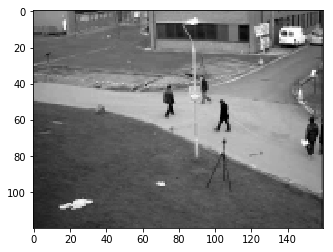

In [13]:
plt.imshow(np.reshape(M[:, 140], dims), cmap="gray")

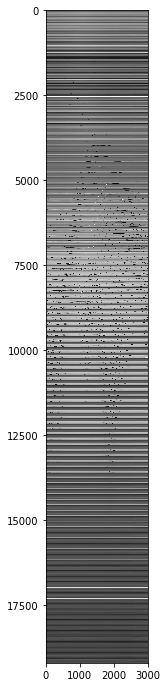

In [36]:
plt.figure(figsize=(12, 12))
plt.imshow(M, cmap='gray')

In [38]:
U = np.load("../chapter2/U.npy")
s = np.load("../chapter2/s.npy")
V = np.load("../chapter2/v.npy")

In [39]:
U.shape, s.shape, V.shape

((19200, 3000), (3000,), (3000, 3000))

In [40]:
reconstructed_matrix = U @ np.diag(s) @ V

In [41]:
np.allclose(M, reconstructed_matrix)

True

In [42]:
low_rank = np.expand_dims(U[:,0], 1) * s[0] * np.expand_dims(V[0,:], 0)

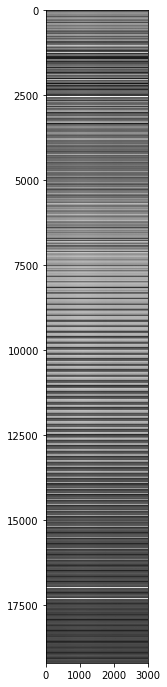

In [43]:
plt.figure(figsize=(12, 12))
plt.imshow(low_rank, cmap='gray')

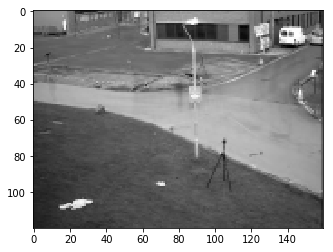

In [44]:
plt.imshow(np.reshape(low_rank[:,0], dims), cmap='gray');


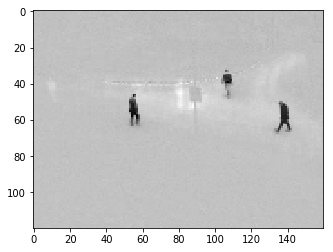

In [45]:
plt.imshow(np.reshape(M[:,0] - low_rank[:,0], dims), cmap='gray');